# Introduction à l'exploration des données

**Objectifs d'apprentissage :**  
- charger un jeu de données  
- explorer et visualiser des variables  
- découvrir les fonctions courantes d'exploration de variables

## Le pipeline de la Data Science

![](https://mickaeltemporao.github.io/itds/images/pipeline.jpg)

## Acquisition de données
Avec quelques bases de Python, nous allons commencer à combiner des packages existants pour acquérir et explorer des données.


Avant de pouvoir commencer à examiner les données, nous devons charger les données dans nos machines.



In [3]:
# Charger les bibliothèques requises
import pandas as pd

# Charger des données pokemon avec pandas
data_url = "https://raw.githubusercontent.com/leomignot/DataSHS_initiation_python/refs/heads/main/data/pokemon_data.csv"
pokemon_data = pd.read_csv(data_url)


### Hack Time

In [4]:
# Quel est le type de pokemon_data ?


### DataFrames

Les DataFrames sont des listes (ou des séries lorsqu'on utilise pandas) qui sont assemblées dans un tableau.

![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

In [5]:
# Un exemple rapide

taille = [178, 195, 175, 168, 200, 300, 170]
age = [37, 18, 25, 30, 35, 99, 49.3]
nom = ["Léo", "Grégoire", "Claire", "Viviane", "Quentin", "Mickael", "Emmanuel"]

# Nous créons un DataFrame à partir de zéro
my_data = pd.DataFrame(
    {
        "Taille": taille,
        "Age": age,
        "Prénom": nom,
    }
)


In [6]:
# Quel est le type de `my_data`
type(my_data)


pandas.core.frame.DataFrame

In [7]:
# Regardez le nouveau jeu de données que vous venez de créer
my_data


,Taille,Age,Prénom
0,178,37.0,Léo
1,195,18.0,Grégoire
2,175,25.0,Claire
3,168,30.0,Viviane
4,200,35.0,Quentin
5,300,99.0,Mickael
6,170,49.3,Emmanuel


In [8]:
# Nous pouvons également en apprendre plus sur notre objet en utilisant la méthode `.info()`.
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Taille  7 non-null      int64  
 1   Age     7 non-null      float64
 2   Prénom  7 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes


In [9]:
# Lorsque votre jeu de données est trop long, vous pourriez vouloir afficher les premières
# observations (lignes) en utilisant la méthode `.head()`.
my_data.head()


,Taille,Age,Prénom
0,178,37.0,Léo
1,195,18.0,Grégoire
2,175,25.0,Claire
3,168,30.0,Viviane
4,200,35.0,Quentin


### Hack Time

In [10]:
# Regardez le début des données pokemon_data


In [11]:
# Regardez les info des données pokemon_data


## Exploration de données - Variables

Maintenant que vous avez vos données, l'étape suivante est de vous familiariser avec elles. 

La plupart du temps, vous vous intéressez à certains concepts spécifiques. 
- Vous avez besoin d'un moyen de sélectionner uniquement les variables liées à vos concepts.


### Sélectionner des variables (colonnes)

Supposons que vous souhaitiez explorer le type principal des pokemons ("Type 1").

- Nous pouvons utiliser des crochets sur un objet DataFrame pour sélectionner une seule colonne !
- Nous pouvons également utiliser une liste de chaînes contenant les noms de colonnes pour sélectionner plusieurs colonnes !

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)


In [12]:
# L'attribut `columns` permet d'obtenir les noms des colonnes d'un DataFrame
pokemon_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [13]:
# Sélectionner la variable présentant le type principal des pokemons
pokemon_data["Type 1"]

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

In [14]:
# Nous pouvons également le sauvegarder dans un nouvel objet et vérifier son type
type_1 = pokemon_data["Type 1"]
type(type_1)


pandas.core.series.Series

Supposons que vous souhaitiez également savoir pour qui les gens ont l'intention de voter en fonction de leur âge et de leur idéologie ? Dans ce cas, vous pourriez avoir besoin de sélectionner plusieurs variables.

In [15]:
# Sélectionner plusieurs colonnes
my_vars = [
    "Name",  # Le nom
    "Type 1",  # Le type 1
    "Type 2",  # Le type 2
    "HP",  # les points de vie
    "Attack",  # l'attaque
    "Defense",  # la défense
]

pokemon_data[my_vars]

,Name,Type 1,Type 2,HP,Attack,Defense
0,Bulbasaur,Grass,Poison,45,49,49
1,Ivysaur,Grass,Poison,60,62,63
2,Venusaur,Grass,Poison,80,82,83
3,VenusaurMega Venusaur,Grass,Poison,80,100,123
4,Charmander,Fire,NaN,39,52,43
...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150
796,DiancieMega Diancie,Rock,Fairy,50,160,110
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60


In [16]:
# Sauvegarder ce sous-ensemble plus petit de variables dans my_df
my_df = pokemon_data[my_vars]
print(type(my_df))
print(my_df.columns)
my_df.head()

<class 'pandas.core.frame.DataFrame'>
Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense'], dtype='object')


,Name,Type 1,Type 2,HP,Attack,Defense
0,Bulbasaur,Grass,Poison,45,49,49
1,Ivysaur,Grass,Poison,60,62,63
2,Venusaur,Grass,Poison,80,82,83
3,VenusaurMega Venusaur,Grass,Poison,80,100,123
4,Charmander,Fire,NaN,39,52,43


Renomons nos colones en français

*(Exemple de cas d'usage réel : pour éviter d'avoir toujours à vérifier un codebook, renomer permet de nettoyer un peu nos données en rendant les noms de colonnes plus explicites.)*

In [17]:
# Renommer les colonnes
my_df.columns = ["nom", "type1", "type2", "pv", "attaque", "défense"]
my_df.head()

,nom,type1,type2,pv,attaque,défense
0,Bulbasaur,Grass,Poison,45,49,49
1,Ivysaur,Grass,Poison,60,62,63
2,Venusaur,Grass,Poison,80,82,83
3,VenusaurMega Venusaur,Grass,Poison,80,100,123
4,Charmander,Fire,NaN,39,52,43


### Méthodes utiles
Les Series et les DataFrames fournissent des méthodes très utiles pour explorer facilement les données. Voici quelques-unes des plus courantes :

- `mean()`
- `std()`
- `min()`
- `max()`
- `count()`
- `describe()`
- `value_counts()`


In [18]:
# Quelle est la répartition des types de pokemons ?
my_df["type1"].value_counts()


type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [19]:
# Quel est le pourcentage de chaque type ?
my_df["type1"].value_counts(normalize=True)


type1
Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Electric    0.05500
Rock        0.05500
Dragon      0.04000
Ground      0.04000
Ghost       0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: proportion, dtype: float64

In [20]:
# Un peu plus propre
my_results = my_df["type1"].value_counts(normalize=True) * 100
my_results.round(1)


type1
Water       14.0
Normal      12.2
Grass        8.8
Bug          8.6
Psychic      7.1
Fire         6.5
Electric     5.5
Rock         5.5
Dragon       4.0
Ground       4.0
Ghost        4.0
Dark         3.9
Poison       3.5
Steel        3.4
Fighting     3.4
Ice          3.0
Fairy        2.1
Flying       0.5
Name: proportion, dtype: float64

### Hack Time

In [21]:
# Quel est le niveau de point de vie moyen des pokemons dans notre dataset ?


In [22]:
# Quel est la médiane des points d'attaque ?


In [23]:
# Quelle est la proportion de pokemons qui ont un second type poison ?
# (pour fignoler : enjeu possible des pokemons qui n'ont pas de second type)


# REPRENDRE À PARTIR D'ICI

## Visualisation de données

Une fois que vous avez trouvé les informations dont vous avez besoin, il est généralement judicieux de représenter graphiquement vos résultats. En effet, une visualisation vous aidera parfois à mieux comprendre les problèmes liés à vos données !

La plupart du temps, vous utiliserez des graphiques en barres et des histogrammes pour visualiser une seule variable, selon son type.

### Types de données

Nous avons vu qu'il existe différents types de données en Python (chaînes de caractères, entiers, décimaux, booléens, ...). Lorsqu'on fait de la recherche, nous pouvons regrouper les données en grandes familles :

Les données **numériques continues** peuvent prendre un nombre infini de valeurs.
- La taille d'un étudiant (par ex. 182.5 cm)
- Pour ces variables, vous utiliserez généralement des **histogrammes**.

Les données **numériques discrètes** ne peuvent prendre qu'un nombre fini de valeurs.
- Le nombre d'étudiants dans une classe (par ex. 22)
- Pour ces variables, vous utiliserez des **histogrammes** ou des **diagrammes en barres**.
- Zone grise

Les données **catégorielles** ("nominales", "qualitatives", etc.)
- Le genre d'un étudiant, sa discipline (par ex. Sociologie)
- Pour ces variables, vous utiliserez des **diagrammes en barres**.

>C'est plus compliqué que ça, plein de types de graphiques possibles, des "règles" et plein d'exceptions, etc.  
>
>**TIP : ** Pour vous aider à choisir le type adapté de visualisation, regardez par là :  [**Data to Viz**]( https://www.data-to-viz.com/)

**N'oubliez pas de synthétiser/regrouper/résumer vos données avant de les tracer !**

- Sinon votre ordinateur ne sera pas content...



### Visualisations avec Pandas

Vous pouvez utiliser pandas pour tracer vos résultats en utilisant la méthode `.plot()` sur un objet DataFrame ou Series.

Pour plus d'informations, cliquez [**ici**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).


<Axes: ylabel='Frequency'>

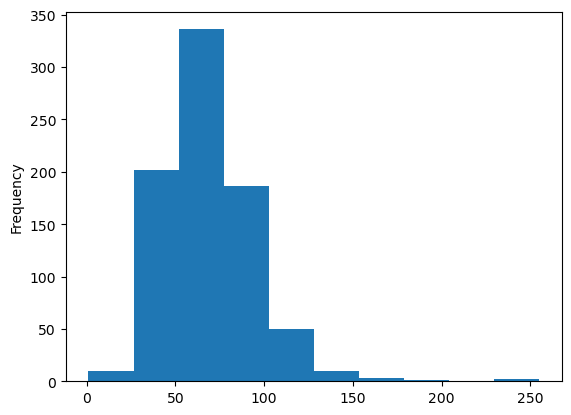

In [36]:
# Traçons la distribution de la variable pv.
my_df["pv"].plot(kind="hist")


<Axes: ylabel='Frequency'>

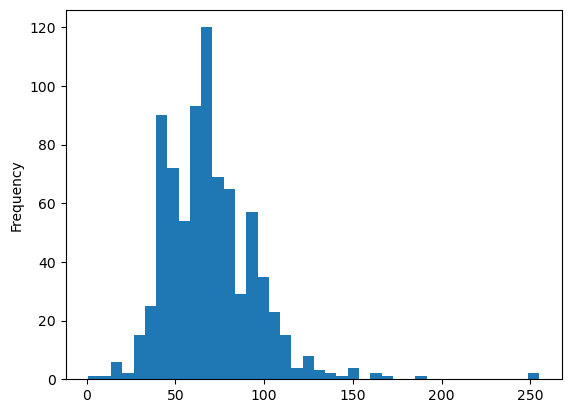

In [27]:
# Approfondir
my_df["pv"].plot(kind="hist", bins=40)


<Axes: xlabel='type1'>

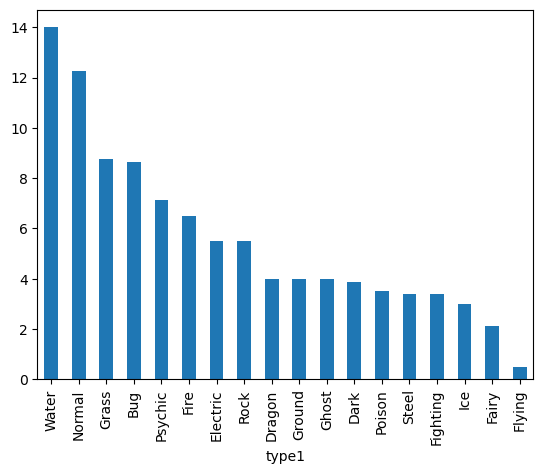

In [37]:
# Regardons la repartition par type

# on avait déjà fait un objet plus haut :
# my_results = my_df["type1"].value_counts(normalize=True) * 100

my_results.plot(kind="bar")


### Hack Time

In [38]:
my_df.columns

Index(['nom', 'type1', 'type2', 'pv', 'attaque', 'défense'], dtype='object')

In [ ]:
# Quelle est la répartition de la défense des pokemons ? Proposez un graphique.


In [ ]:
# Quels sont les type 2 les plus fréquents ? Proposez un graphique.


### Aller plus loin

Il existe de nombreuses options pour jouer avec et améliorer une figure. 
Lorsque vous cherchez de l'aide pour changer quelque chose sur une figure, si vous avez la bonne terminologie, il est assez facile de trouver de l'aide !

#### Anatomie d'une figure
![Anatomie d'une figure](https://matplotlib.org/3.1.1/_images/anatomy.png)

# REPRENDRE ICI

Essayons d'améliorer un peu notre graphique des intentions de vote.

In [ ]:
# Filtrer les observations (pour la prochaine fois)
mask = my_df["vote_int"].between(1, 4)

# Résumer les données
tmp_data = (
    my_df.loc[mask, "vote_int"]
    .replace({1: "Biden", 2: "Trump", 3: "Jorgensen", 4: "Hawkins"})
    .value_counts(normalize=True)
)

# Créer un graphique/figure
tmp_data.plot(
    kind="bar",
    title="Intentions de vote",
    ylabel="Pourcentage",
    rot=0,
);


In [ ]:
tmp_data

<Axes: title={'center': 'pv'}, xlabel='type1'>

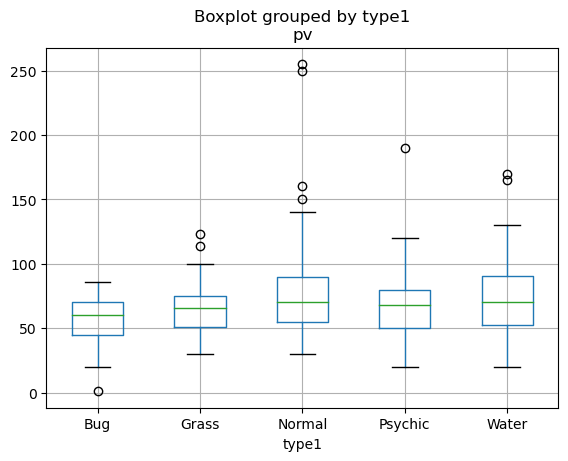

In [ ]:
# Y a-t-il une relation entre le type et les pv ?

# Repérer seulement les 5 types1 les plus fréquents pour lisibilité
top_types = my_df["type1"].value_counts()[0:5].index

# créer un df spécifique au top5
df_top5 = my_df[my_df["type1"].isin(top_types)]

# faire une boxplot des pv par type1
df_top5.boxplot(column=["pv"], by="type1")


array([<Axes: title={'center': 'attaque'}, xlabel='type1'>,
       <Axes: title={'center': 'défense'}, xlabel='type1'>], dtype=object)

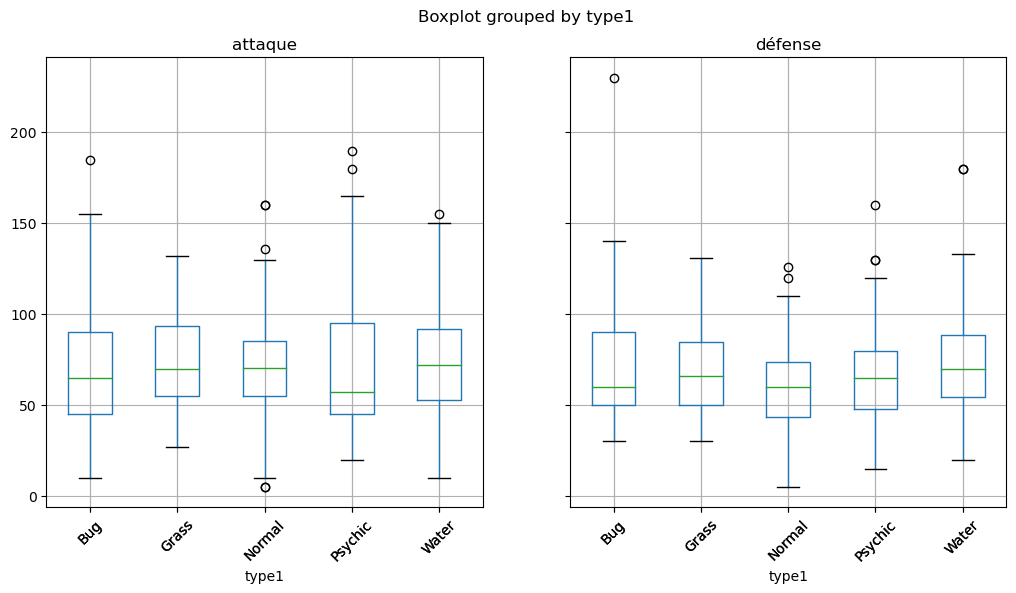

In [ ]:
# Boxplots avec pandas : une figure par colonne ('attaque' et 'défense') regroupée par 'type1'
df_top5.boxplot(column=["attaque", "défense"], by="type1", figsize=(12, 6), rot=45)

In [ ]:
# On a moyen de faire moins moche hein :

import plotly.express as px

fig = px.box(
    df_top5,
    x="type1",
    y="pv",
    title="Distribution des points de vie (pv) par type1 (top 5 types)",
)

fig.update_layout(template="plotly_white")

fig.show()
